Fetching article count for keyword: SAP Business ByDesign
Found 99400 articles for SAP Business ByDesign
Fetching article count for keyword: Oracle NetSuite
Found 3160000 articles for Oracle NetSuite
Fetching article count for keyword: Salesforce
Found 97900000 articles for Salesforce
Fetching article count for keyword: HubSpot CRM
Found 11400000 articles for HubSpot CRM
Fetching article count for keyword: Microsoft Power BI
Found 81300000 articles for Microsoft Power BI
Fetching article count for keyword: Tableau
Found 236000000 articles for Tableau
Fetching article count for keyword: Notion
Found 258000000 articles for Notion
Fetching article count for keyword: Slack
Found 0 articles for Slack
Fetching article count for keyword: Microsoft Teams
Found 357000000 articles for Microsoft Teams
Fetching article count for keyword: Zoom
Found 0 articles for Zoom
Fetching article count for keyword: Zapier
Found 12300000 articles for Zapier
Fetching article count for keyword: Asana
Found 0 art

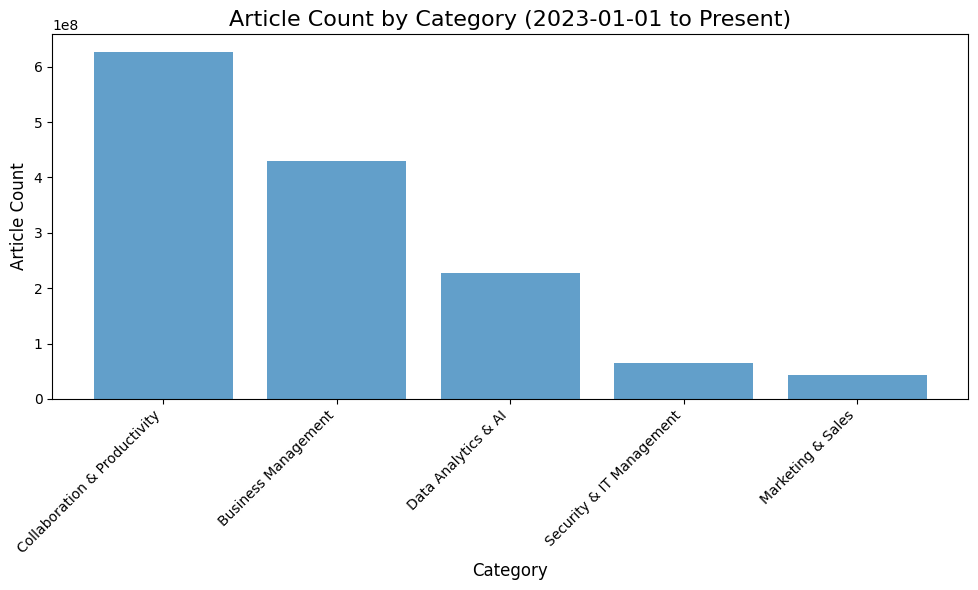

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Define categories and keywords
categories = {
    "Business Management": [
        "SAP Business ByDesign", "Oracle NetSuite", "Salesforce", "HubSpot CRM", "Microsoft Power BI", "Tableau"
    ],
    "Collaboration & Productivity": [
        "Notion", "Slack", "Microsoft Teams", "Zoom", "Zapier", "Asana"
    ],
    "Data Analytics & AI": [
        "Google BigQuery", "Apache Hadoop", "IBM Watson", "Google Cloud AI Platform", "SAS Advanced Analytics", "RapidMiner"
    ],
    "Marketing & Sales": [
        "Marketo", "Mailchimp", "Adobe Experience Cloud", "Zendesk", "Hootsuite", "Sprout Social"
    ],
    "Security & IT Management": [
        "Zscaler", "Cloudflare", "CrowdStrike Falcon", "Symantec Endpoint Protection", "Okta", "Microsoft Azure Active Directory"
    ]
}

# Date range for the search
start_date = "2023-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

# Function to perform Google search and count articles
def google_search_count(keyword):
    search_url = f"https://www.google.com/search?q={keyword}+after:{start_date}+before:{end_date}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(search_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    result_stats = soup.find("div", id="result-stats")
    if result_stats:
        count_text = result_stats.text.split(" ")[1].replace(",", "")
        try:
            return int(count_text)
        except ValueError:
            return 0
    return 0

# Collect data
category_counts = {}

for category, keywords in categories.items():
    total_count = 0
    for keyword in keywords:
        print(f"Fetching article count for keyword: {keyword}")
        count = google_search_count(keyword)
        total_count += count
        print(f"Found {count} articles for {keyword}")
    category_counts[category] = total_count

# Create DataFrame
category_df = pd.DataFrame(list(category_counts.items()), columns=["Category", "Article Count"])
category_df = category_df.sort_values(by="Article Count", ascending=False)

# Display DataFrame
print(category_df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(category_df["Category"], category_df["Article Count"], alpha=0.7)
plt.title("Article Count by Category (2023-01-01 to Present)", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Article Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


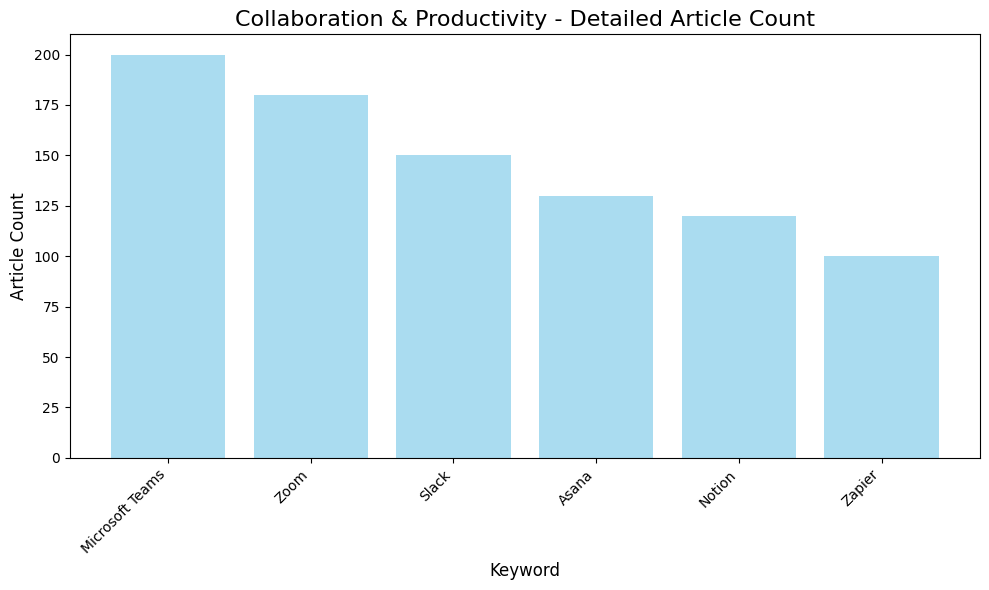

In [11]:
# Detailed visualization for Collaboration & Productivity
if "Collaboration & Productivity" in category_details:
    details = category_details["Collaboration & Productivity"]
    details_df = pd.DataFrame(details, columns=["Keyword", "Article Count"])
    details_df = details_df.sort_values(by="Article Count", ascending=False)

    # Plot detailed data
    plt.figure(figsize=(10, 6))
    plt.bar(details_df["Keyword"], details_df["Article Count"], alpha=0.7, color="skyblue")
    plt.title("Collaboration & Productivity - Detailed Article Count", fontsize=16)
    plt.xlabel("Keyword", fontsize=12)
    plt.ylabel("Article Count", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
